# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [1]:
import pandas as pd
import numpy as np

c:\Users\Reem Salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Reem Salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
c:\Users\Reem Salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
cols= ["household_key", "BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"]
int_datatype = {"DAY":"Int16",
                "PRODUCT_ID":"Int32",
                "QUANTITY":"Int32"}
transactions = pd.read_csv("../project_data/project_transactions.csv",
                           usecols=cols,
                           dtype=int_datatype)

In [3]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     Int32  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(1), Int32(2), float64(1), int64(2)
memory usage: 75.7 MB


In [4]:
transactions.describe(include="all").round()

household_key     BASKET_ID        DAY  PRODUCT_ID   QUANTITY  \
count      2146311.0  2.146311e+06  2146311.0   2146311.0  2146311.0   
mean          1056.0  3.404897e+10      390.0   2884715.0      101.0   
std            605.0  4.723748e+09      190.0   3831949.0     1152.0   
min              1.0  2.698490e+10        1.0     25671.0        0.0   
25%            548.0  3.040798e+10      229.0    917231.0        1.0   
50%           1042.0  3.281176e+10      392.0   1027960.0        1.0   
75%           1581.0  4.012804e+10      555.0   1132771.0        1.0   
max           2099.0  4.230536e+10      711.0  18316298.0    89638.0   

       SALES_VALUE  
count    2146311.0  
mean           3.0  
std            4.0  
min            0.0  
25%            1.0  
50%            2.0  
75%            3.0  
max          840.0

In [5]:
# Use the following snippet to create a Date Column then drop. Then drop the `DAY` column.

transactions = (
    transactions
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

In [6]:
transactions

household_key    BASKET_ID  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0                 1364  26984896261      842930         1         2.19   
1                 1364  26984896261      897044         1         2.99   
2                 1364  26984896261      920955         1         3.09   
3                 1364  26984896261      937406         1         2.50   
4                 1364  26984896261      981760         1         0.60   
...                ...          ...         ...       ...          ...   
2146306           1598  42305362535       92130         1         0.99   
2146307           1598  42305362535      114102         1         8.89   
2146308           1598  42305362535      133449         1         6.99   
2146309           1598  42305362535     6923644         1         4.50   
2146310           1598  42305362535    14055192         1         6.99   

              date  
0       2016-01-01  
1       2016-01-01  
2       2016-01-01  
3       2016-01-01  
4       2016-01-01  
...            ...  
2146306 2017-12-11  
2146307 2017-12-11  
2146308 2017-12-11  
2146309 2017-12-11  
2146310 2017-12-11  

[2146311 rows x 6 columns]

## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

<Axes: xlabel='date'>

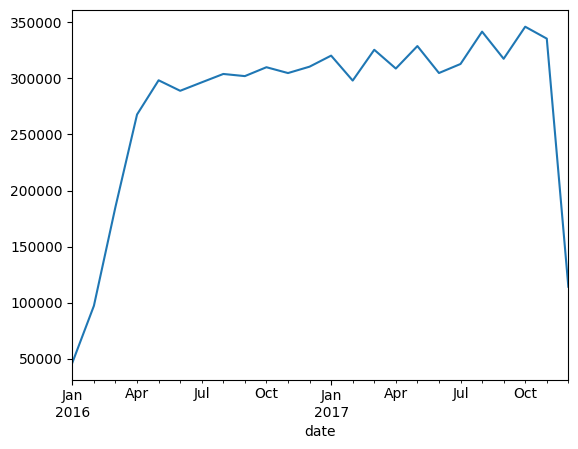

In [7]:
# Set a date index, graby the sales column, and calculate a monthly sum using resampling.
# Then build the default line plot
(transactions.set_index("date")
 .loc[:,"SALES_VALUE"]
 .resample("M")
 .sum()
 .plot())

<Axes: xlabel='date'>

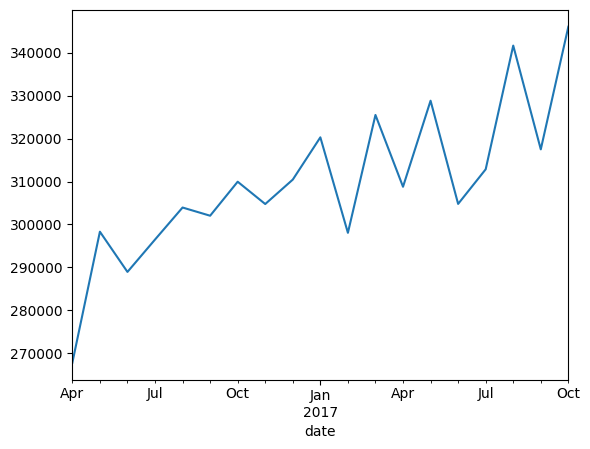

In [9]:
# Filter above plot to specified date range with row slice in .loc
(transactions.set_index("date")
 .loc["2016-04":"2017-10","SALES_VALUE"]
 .resample("M")
 .sum()
 .plot())

<Axes: xlabel='date'>

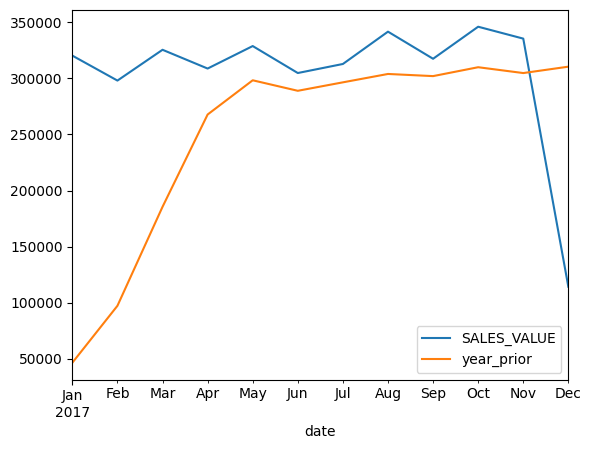

In [10]:
# After resampling monthly sales, create a year_prior column with assign
# This column is our monthly sales shifted forward a year (12 rows/months)
(transactions.set_index("date")
 .loc[:,["SALES_VALUE"]]
 .resample("M")
 .sum()
 .assign(year_prior = lambda x: x["SALES_VALUE"].shift(12))
 .loc["2017"]
 .plot())

<Axes: xlabel='date'>

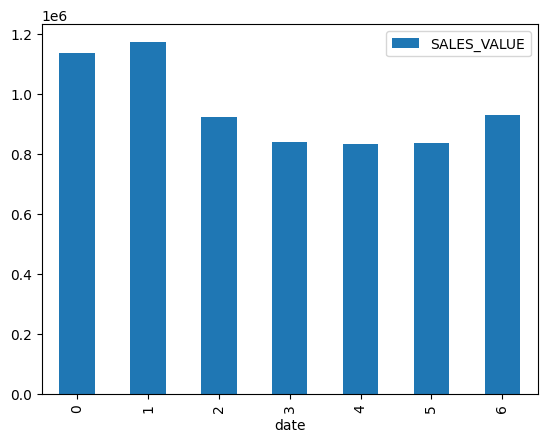

In [47]:
# Group transactions by dayofweek, then calculate sum and plot a bar chart
transactions.groupby(transactions["date"].dt.dayofweek).agg({"SALES_VALUE":"sum"}).plot.bar()


# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [21]:
cols=["AGE_DESC", "INCOME_DESC", "household_key", "HH_COMP_DESC"]
data_type = {"AGE_DESC":"category",
             "INCOME_DESC":"category",
             "HH_COMP_DESC":"category",
             "household_key":"Int16"}
hh_demographic = pd.read_csv("../project_data/hh_demographic.csv",usecols=cols,dtype=data_type)


In [22]:
hh_demographic.info("deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    Int16   
dtypes: Int16(1), category(3)
memory usage: 5.6 KB


In [23]:
hh_demographic.describe(include="all")

AGE_DESC INCOME_DESC      HH_COMP_DESC  household_key
count       801         801               801          801.0
unique        6          12                 6           <NA>
top       45-54      50-74K  2 Adults No Kids           <NA>
freq        288         192               255           <NA>
mean        NaN         NaN               NaN     1235.17603
std         NaN         NaN               NaN     736.804647
min         NaN         NaN               NaN            1.0
25%         NaN         NaN               NaN          596.0
50%         NaN         NaN               NaN         1218.0
75%         NaN         NaN               NaN         1914.0
max         NaN         NaN               NaN         2499.0

In [126]:
# Create total sales by household dataframe
house_sales = transactions.groupby(transactions["household_key"]).agg({"SALES_VALUE":"sum"})
house_sales

SALES_VALUE
household_key             
1                  4330.16
2                  1954.34
3                  2653.21
4                  1200.11
5                   779.06
...                    ...
2095               3790.49
2096               1301.65
2097               8823.83
2098                682.46
2099                691.30

[2099 rows x 1 columns]

In [84]:
# Join household sales and demographics table on household_key (inner since we're interested in both sets)
household_sales_demo = (hh_demographic.merge(
    house_sales,
    how = "inner",
    left_on = "household_key",
    right_on="household_key"
))

<Axes: xlabel='AGE_DESC'>

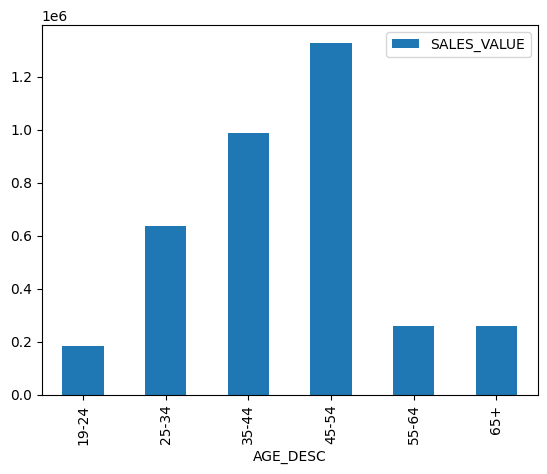

In [85]:
# Calculate sum of sales by age group
(household_sales_demo.groupby(["AGE_DESC"]).
 agg({"SALES_VALUE":"sum"})
 .plot.bar()
 )

In [86]:
household_sales_demo

AGE_DESC INCOME_DESC      HH_COMP_DESC  household_key  SALES_VALUE
0        65+      35-49K  2 Adults No Kids              1      4330.16
1      45-54      50-74K  2 Adults No Kids              7      3400.05
2      25-34      25-34K     2 Adults Kids              8      5534.97
3      25-34      75-99K     2 Adults Kids             13     13190.92
4      45-54      50-74K     Single Female             16      1512.02
..       ...         ...               ...            ...          ...
663    45-54    100-124K           Unknown           2087      7832.74
664    25-34      35-49K     Single Female           2088      4905.71
665    35-44   Under 15K      1 Adult Kids           2092      2290.54
666    45-54      50-74K  2 Adults No Kids           2094      3055.52
667    35-44      15-24K     2 Adults Kids           2097      8823.83

[668 rows x 5 columns]

<Axes: xlabel='INCOME_DESC'>

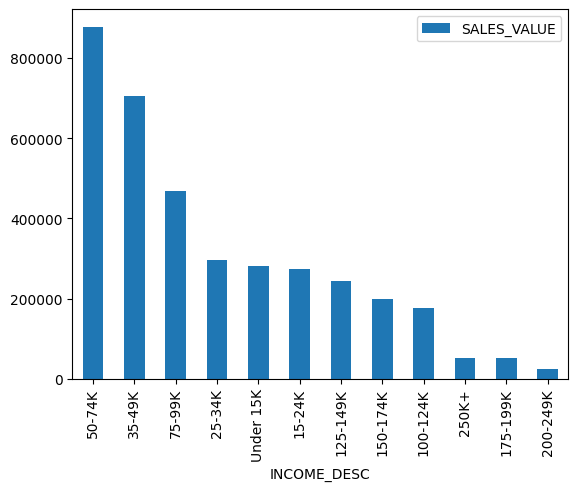

In [87]:
# Calculate sum of sales by income, ordered by magnitude
(household_sales_demo.groupby(["INCOME_DESC"])
 .agg({"SALES_VALUE":"sum"})
 .sort_values("SALES_VALUE",ascending=False)
 .plot.bar()
 )

In [90]:
# Calculate mean household spend by Age Description and HH Composition
# Format with a heatmap across all cells
household_sales_demo.pivot_table(
    index="AGE_DESC",
    columns="HH_COMP_DESC",
    values="SALES_VALUE",
    aggfunc="mean",
    margins=True
).style.background_gradient(cmap="RdYlGn",axis=None)

# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [98]:
product = pd.read_csv("../project_data/product.csv",
                      usecols=["PRODUCT_ID","DEPARTMENT"],
                      dtype={"PRODUCT_ID":"Int32",
                             "DEPARTMENT":"category"})

In [99]:
product.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PRODUCT_ID  92353 non-null  Int32   
 1   DEPARTMENT  92353 non-null  category
dtypes: Int32(1), category(1)
memory usage: 545.2 KB


In [114]:
# Join all three tables together with an inner join
# Join product on product_id (only shared column)
trans_demo_dept=(transactions
    .merge(
        hh_demographic,
        how="inner",
        left_on="household_key",
        right_on="household_key")
    .merge(
        product,
        how="inner",
        left_on="PRODUCT_ID",
        right_on="PRODUCT_ID"
    ))

In [115]:
trans_demo_dept

household_key    BASKET_ID  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0                 1364  26984896261      842930         1         2.19   
1                  304  27950201718      842930         1         1.67   
2                  575  34186568032      842930         1         1.67   
3                   77  28023861855      842930         3         5.00   
4                  454  42136182098      842930         1         1.67   
...                ...          ...         ...       ...          ...   
1161570            540  41413346731      913709         1        10.99   
1161571            540  41587471481     1024615         1        11.99   
1161572            540  41587471481     9831733         1         0.00   
1161573            540  41834711355      830676         1         8.99   
1161574            540  41865495241      924549         1         4.09   

              date AGE_DESC INCOME_DESC      HH_COMP_DESC DEPARTMENT  
0       2016-01-01      65+    100-124K     Single Female    GROCERY  
1       2016-03-21    25-34      50-74K  2 Adults No Kids    GROCERY  
2       2017-04-29    35-44      50-74K     Single Female    GROCERY  
3       2016-03-27    35-44    100-124K     2 Adults Kids    GROCERY  
4       2017-11-29    55-64      35-49K       Single Male    GROCERY  
...            ...      ...         ...               ...        ...  
1161570 2017-10-06    25-34      50-74K     Single Female    DRUG GM  
1161571 2017-10-19    25-34      50-74K     Single Female    DRUG GM  
1161572 2017-10-19    25-34      50-74K     Single Female    DRUG GM  
1161573 2017-11-07    25-34      50-74K     Single Female  NUTRITION  
1161574 2017-11-09    25-34      50-74K     Single Female    GROCERY  

[1161575 rows x 10 columns]

In [124]:
# Which category does our youngest demographic perform well in?
trans_demo_dept_pvtb = trans_demo_dept.pivot_table(
    index="DEPARTMENT",
    columns="AGE_DESC",
    values="SALES_VALUE",
    aggfunc="sum",
    ).style.background_gradient(cmap="RdYlGn",axis=1)
trans_demo_dept_pvtb

# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [106]:
trans_demo_dept_pvtb

household_key    BASKET_ID  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0                 1364  26984896261      842930         1         2.19   
1                 1364  26984896261      897044         1         2.99   
2                 1364  26984896261      920955         1         3.09   
3                 1364  26984896261      937406         1         2.50   
4                 1364  26984896261      981760         1         0.60   
...                ...          ...         ...       ...          ...   
2146306           1598  42305362535       92130         1         0.99   
2146307           1598  42305362535      114102         1         8.89   
2146308           1598  42305362535      133449         1         6.99   
2146309           1598  42305362535     6923644         1         4.50   
2146310           1598  42305362535    14055192         1         6.99   

              date  
0       2016-01-01  
1       2016-01-01  
2       2016-01-01  
3       2016-01-01  
4       2016-01-01  
...            ...  
2146306 2017-12-11  
2146307 2017-12-11  
2146308 2017-12-11  
2146309 2017-12-11  
2146310 2017-12-11  

[2146311 rows x 6 columns]

In [125]:
trans_demo_dept_pvtb.to_excel("trans_demo_dept.xlsx",sheet_name="sales_pivot")